**Importing all the important libraries**

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datasets import load_dataset, Dataset
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from lime import lime_tabular
from mediapipe_handler import MediaPipeHandler
from get_work_out_labels import add_workout_label_back
import seaborn as sns
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
# from anchor import utils
# from anchor import anchor_tabular


**Workflow**
1. Loading Training and Testing Datasets
2. Add Label string values
3. Looking at workout distributions
4. Preprocessing
5. Feature Engineering
6. Train Random Forest with hyperparameters [with and without feature engineering]
7. Train Neural Network with hyperparameters [with and without feature engineering]
8. Train SVM with hyperparameters [with and without feature engineering]
9. Compare model performance in terms of SPEED,ACCURACY,PERCISION,RECALL,F1-SCORE
10. Do the same process but with SMOTE to handle imbalance classes, then compare accuracy

**1. Loading Training and Testing Datasets**

In [74]:
mediapipe_model = MediaPipeHandler()

training_dataset=mediapipe_model.read_csv_to_pd("D:\\Advanced_AI\\AI\\train_new.csv")
testing_dataset=mediapipe_model.read_csv_to_pd("D:\\Advanced_AI\\AI\\test_new.csv")
validation_dataset=mediapipe_model.read_csv_to_pd("D:\\Advanced_AI\\AI\\validation_new.csv")
combined_dataset = pd.concat([training_dataset, testing_dataset], ignore_index=True)

**2. Add Label String Values**

In [75]:
combined_dataset['WorkoutLabel']=combined_dataset.apply(lambda x: add_workout_label_back(x['label']) ,axis=1)
validation_dataset['WorkoutLabel']=validation_dataset.apply(lambda x: add_workout_label_back(x['label']) ,axis=1)

**3. Looking at Workout Distribution**

In [76]:
Workout_labels=combined_dataset['WorkoutLabel'].unique()

In [77]:
X_hierarchical = combined_dataset.copy()

In [78]:
X_hierarchical['Specific Classification'] = np.where(X_hierarchical['WorkoutLabel'] == 'barbell bicep curl', 0,
                         np.where(X_hierarchical['WorkoutLabel'] == 'hammer curl', 5, 30))


X_hierarchical

,Unnamed: 0,image,label,muscle group,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,...,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index,WorkoutLabel,Specific Classification
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.5833196, 0.33580318, -0.21178767]","[0.47458136, 0.34345636, 0.10874679]","[0.57977086, 0.46415919, -0.47176945]","[0.43594614, 0.45717493, 0.02466545]","[0.56032622, 0.30753931, -0.67780912]","[0.41948569, 0.34880683, -0.22920853]",...,"[0.5395903, 0.87229109, -0.12797548]","[0.47882056, 0.83482677, 0.09046733]","[0.57926077, 1.00452185, 0.16046034]","[0.49489287, 1.00004327, 0.30162144]","[0.59262854, 1.01897967, 0.18326579]","[0.50915658, 1.01278317, 0.31755036]","[0.54145193, 1.08223307, 0.05403144]","[0.45173571, 1.07756639, 0.19764052]",barbell bicep curl,0
1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.67864227, 0.44007847, -0.61281157]","[0.51508331, 0.35392922, -0.11702637]","[0.67732167, 0.74100083, -0.5522756]","[0.4897728, 0.60025042, 0.07598472]","[0.61691177, 0.97857672, -0.45322162]","[0.45017678, 0.78440237, 0.03856679]",...,"[0.54428422, 1.10362673, -0.05568497]","[0.50352174, 1.00672913, 0.34694716]","[0.55549401, 1.30219674, 0.41977754]","[0.49522635, 1.25586081, 0.75884837]","[0.57307285, 1.33680952, 0.45630074]","[0.49889699, 1.29905045, 0.79597855]","[0.4998886, 1.36149573, 0.31691936]","[0.43795371, 1.30396044, 0.67758882]",barbell bicep curl,0
2,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.69693595, 0.42484942, -0.54643494]","[0.5414809, 0.3626397, 0.05607326]","[0.69159269, 0.72796458, -0.47757795]","[0.50304294, 0.59366345, 0.26994297]","[0.60007864, 0.97318113, -0.33487263]","[0.4317157, 0.74968982, 0.221766]",...,"[0.56669152, 1.1428107, -0.0867893]","[0.51520008, 1.03812408, 0.34105164]","[0.56008267, 1.35045171, 0.33445409]","[0.50417012, 1.30311942, 0.71437806]","[0.57579422, 1.38513505, 0.36577019]","[0.50641191, 1.34992421, 0.74796361]","[0.49819234, 1.41932583, 0.23056105]","[0.4493897, 1.35124731, 0.64058065]",barbell bicep curl,0
3,3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.73515791, 0.42139792, -0.44522965]","[0.56772029, 0.33572495, -0.02038416]","[0.71257848, 0.69318485, -0.42954224]","[0.52117139, 0.53452033, 0.11454836]","[0.57872039, 0.74771893, -0.41099623]","[0.42096221, 0.56698191, -0.03880053]",...,"[0.56389433, 1.0513351, -0.05874701]","[0.52235311, 0.98940063, 0.26710114]","[0.62840301, 1.19985843, 0.27531052]","[0.5560208, 1.18725681, 0.54255092]","[0.65617859, 1.22073638, 0.30534539]","[0.57421941, 1.22636902, 0.57130569]","[0.59127408, 1.28368247, 0.25454187]","[0.49074861, 1.25892329, 0.53612298]",barbell bicep curl,0
4,4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.74208808, 0.42787308, -0.40222892]","[0.56917161, 0.36541611, 0.02321619]","[0.71893549, 0.71135747, -0.33957008]","[0.51690018, 0.55520439, -0.06789815]","[0.59105009, 0.64484054, -0.20590726]","[0.42900956, 0.49844888, -0.50125289]",...,"[0.59540391, 1.14598823, 0.00768962]","[0.50538111, 1.11401439, 0.41538179]","[0.57525152, 1.37389243, 0.27296644]","[0.50017542, 1.35379958, 0.76125646]","[0.58630925, 1.4121573, 0.29041424]","[0.50934988, 1.40208185, 0.79376227]","[0.51287192, 1.45682466, 0.128802]","[0.43914852, 1.42183828, 0.67137176]",barbell bicep curl,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,1397,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21,5,"[0.69814205, 0.38044816, -0.09649066]","[0.4967646, 0.42876548, -0.02642469]","[0.74158657, 0.61721599, -0.00643489]","[0.46550187, 0.65274161, 0.02646272]","[0.73340917, 0.76495641, -0.03126102]","[0.46158457, 0.80461067, -0.06425162]",...,"[0.71956444, 1.10848057, 0.21711069]","[0.66393536, 1.1177249, 0.18785827]","[0.7444033, 1.35010803, 0.62804389]","[0.67202133, 1.36439908, 0.55353802]","[0.75289923, 1.38910818, 0.66112554]","[0.67319

In [70]:
X_hierarchical.loc[
    X_hierarchical['WorkoutLabel'].isin(["barbell bicep curl", "hammer curl"]),
    'WorkoutLabel'
] = "Curl Exercises"
X_hierarchical

,Unnamed: 0,image,label,muscle group,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,...,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index,WorkoutLabel,Specific Classification
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.5833196, 0.33580318, -0.21178767]","[0.47458136, 0.34345636, 0.10874679]","[0.57977086, 0.46415919, -0.47176945]","[0.43594614, 0.45717493, 0.02466545]","[0.56032622, 0.30753931, -0.67780912]","[0.41948569, 0.34880683, -0.22920853]",...,"[0.5395903, 0.87229109, -0.12797548]","[0.47882056, 0.83482677, 0.09046733]","[0.57926077, 1.00452185, 0.16046034]","[0.49489287, 1.00004327, 0.30162144]","[0.59262854, 1.01897967, 0.18326579]","[0.50915658, 1.01278317, 0.31755036]","[0.54145193, 1.08223307, 0.05403144]","[0.45173571, 1.07756639, 0.19764052]",Curl Exercises,0
1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.67864227, 0.44007847, -0.61281157]","[0.51508331, 0.35392922, -0.11702637]","[0.67732167, 0.74100083, -0.5522756]","[0.4897728, 0.60025042, 0.07598472]","[0.61691177, 0.97857672, -0.45322162]","[0.45017678, 0.78440237, 0.03856679]",...,"[0.54428422, 1.10362673, -0.05568497]","[0.50352174, 1.00672913, 0.34694716]","[0.55549401, 1.30219674, 0.41977754]","[0.49522635, 1.25586081, 0.75884837]","[0.57307285, 1.33680952, 0.45630074]","[0.49889699, 1.29905045, 0.79597855]","[0.4998886, 1.36149573, 0.31691936]","[0.43795371, 1.30396044, 0.67758882]",Curl Exercises,0
2,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.69693595, 0.42484942, -0.54643494]","[0.5414809, 0.3626397, 0.05607326]","[0.69159269, 0.72796458, -0.47757795]","[0.50304294, 0.59366345, 0.26994297]","[0.60007864, 0.97318113, -0.33487263]","[0.4317157, 0.74968982, 0.221766]",...,"[0.56669152, 1.1428107, -0.0867893]","[0.51520008, 1.03812408, 0.34105164]","[0.56008267, 1.35045171, 0.33445409]","[0.50417012, 1.30311942, 0.71437806]","[0.57579422, 1.38513505, 0.36577019]","[0.50641191, 1.34992421, 0.74796361]","[0.49819234, 1.41932583, 0.23056105]","[0.4493897, 1.35124731, 0.64058065]",Curl Exercises,0
3,3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.73515791, 0.42139792, -0.44522965]","[0.56772029, 0.33572495, -0.02038416]","[0.71257848, 0.69318485, -0.42954224]","[0.52117139, 0.53452033, 0.11454836]","[0.57872039, 0.74771893, -0.41099623]","[0.42096221, 0.56698191, -0.03880053]",...,"[0.56389433, 1.0513351, -0.05874701]","[0.52235311, 0.98940063, 0.26710114]","[0.62840301, 1.19985843, 0.27531052]","[0.5560208, 1.18725681, 0.54255092]","[0.65617859, 1.22073638, 0.30534539]","[0.57421941, 1.22636902, 0.57130569]","[0.59127408, 1.28368247, 0.25454187]","[0.49074861, 1.25892329, 0.53612298]",Curl Exercises,0
4,4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.74208808, 0.42787308, -0.40222892]","[0.56917161, 0.36541611, 0.02321619]","[0.71893549, 0.71135747, -0.33957008]","[0.51690018, 0.55520439, -0.06789815]","[0.59105009, 0.64484054, -0.20590726]","[0.42900956, 0.49844888, -0.50125289]",...,"[0.59540391, 1.14598823, 0.00768962]","[0.50538111, 1.11401439, 0.41538179]","[0.57525152, 1.37389243, 0.27296644]","[0.50017542, 1.35379958, 0.76125646]","[0.58630925, 1.4121573, 0.29041424]","[0.50934988, 1.40208185, 0.79376227]","[0.51287192, 1.45682466, 0.128802]","[0.43914852, 1.42183828, 0.67137176]",Curl Exercises,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,1397,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21,5,"[0.69814205, 0.38044816, -0.09649066]","[0.4967646, 0.42876548, -0.02642469]","[0.74158657, 0.61721599, -0.00643489]","[0.46550187, 0.65274161, 0.02646272]","[0.73340917, 0.76495641, -0.03126102]","[0.46158457, 0.80461067, -0.06425162]",...,"[0.71956444, 1.10848057, 0.21711069]","[0.66393536, 1.1177249, 0.18785827]","[0.7444033, 1.35010803, 0.62804389]","[0.67202133, 1.36439908, 0.55353802]","[0.75289923, 1.38910818, 0.66112554]","[0.67319971, 1.40723383, 0.5

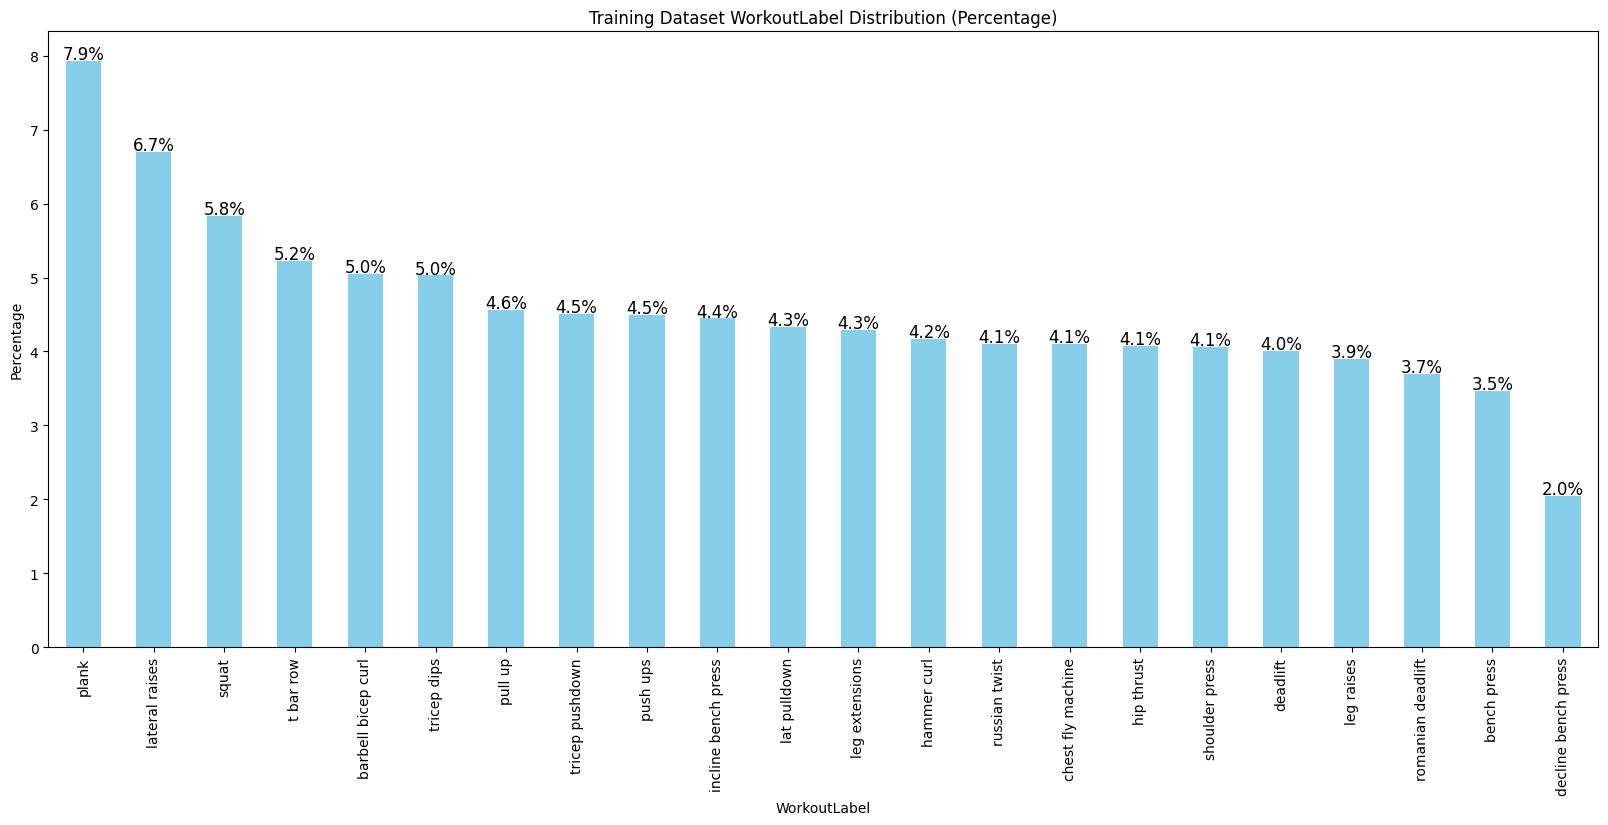

In [79]:
plt.figure(figsize=(20,8))
value_counts = combined_dataset['WorkoutLabel'].value_counts()
percentages = value_counts / value_counts.sum() * 100

# Plot
ax = percentages.plot(kind='bar', color='skyblue')

# Add percentage text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Training Dataset WorkoutLabel Distribution (Percentage)')
plt.ylabel('Percentage')
plt.show()

**4. Preprocessing**

**We have to make sure that we get right of Unamed 0: column, as it just contains numerical index not very useful, might lead to overfitting if it is left**
- Get rid of Unnamed 0:
- Get rid of image
- Get rid of muscle group
- split each feature into x,y,z components, then remove that original feature


In [80]:
"""
Removes original feature and splits it into x,y,z components

"""
def Preprocess_data(dataframe,columns_to_flatten):
    final_df=dataframe.copy()
    # Expanding each column into 3 separate columns (x, y, z) and appending it to the final dataframe.
    for column in columns_to_flatten:
        # print(np.vstack(dataframe[column]).astype(float))
        expanded_df=pd.DataFrame(np.vstack(dataframe[column]).astype(float), 
                           columns=[column+'_x', column+'_y', column+'_z'],
                           index=dataframe.index)
        new_df = pd.concat([dataframe.drop(column, axis=1), expanded_df], axis=1)
        for new_column in new_df.columns:
            final_df[new_column] = new_df[new_column]

    return final_df.drop(columns=columns_to_flatten,axis=1)

"""
Splits dataset into X_train,y_train or X_test,y_test, if you give it training dataset then X_train and y_train

"""
def Return_X_y(dataframe,columns_to_delete):
    X=dataframe.drop(columns=columns_to_delete)
    y=dataframe['label']
    return X,y

In [ ]:
features_to_split=['left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index',
       'left_thumb', 'right_thumb', 'left_hip', 'right_hip', 'left_knee',
       'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
       'left_foot_index', 'right_foot_index']

validation_dataset_preprocessed=Preprocess_data(validation_dataset,features_to_split)
training_dataset_preprocessed=Preprocess_data(combined_dataset,features_to_split)
X, y = Return_X_y(training_dataset_preprocessed,['label','muscle group','WorkoutLabel','image','Unnamed: 0'])
X_val, y_val = Return_X_y(validation_dataset_preprocessed,['label','muscle group','WorkoutLabel','image','Unnamed: 0'])
X_hierarchical_preprocessed = Preprocess_data(X_hierarchical,features_to_split)
X_hierarchical_predict, y = Return_X_y(X_hierarchical_preprocessed,['label','muscle group','WorkoutLabel','image','Unnamed: 0'])

**66 Features is all the features**

**Exploring dataset**

array([[<Axes: title={'center': 'left_shoulder_x'}>,
        <Axes: title={'center': 'left_shoulder_y'}>,
        <Axes: title={'center': 'left_shoulder_z'}>,
        <Axes: title={'center': 'right_shoulder_x'}>,
        <Axes: title={'center': 'right_shoulder_y'}>,
        <Axes: title={'center': 'right_shoulder_z'}>,
        <Axes: title={'center': 'left_elbow_x'}>,
        <Axes: title={'center': 'left_elbow_y'}>],
       [<Axes: title={'center': 'left_elbow_z'}>,
        <Axes: title={'center': 'right_elbow_x'}>,
        <Axes: title={'center': 'right_elbow_y'}>,
        <Axes: title={'center': 'right_elbow_z'}>,
        <Axes: title={'center': 'left_wrist_x'}>,
        <Axes: title={'center': 'left_wrist_y'}>,
        <Axes: title={'center': 'left_wrist_z'}>,
        <Axes: title={'center': 'right_wrist_x'}>],
       [<Axes: title={'center': 'right_wrist_y'}>,
        <Axes: title={'center': 'right_wrist_z'}>,
        <Axes: title={'center': 'left_pinky_x'}>,
        <Axes: title=

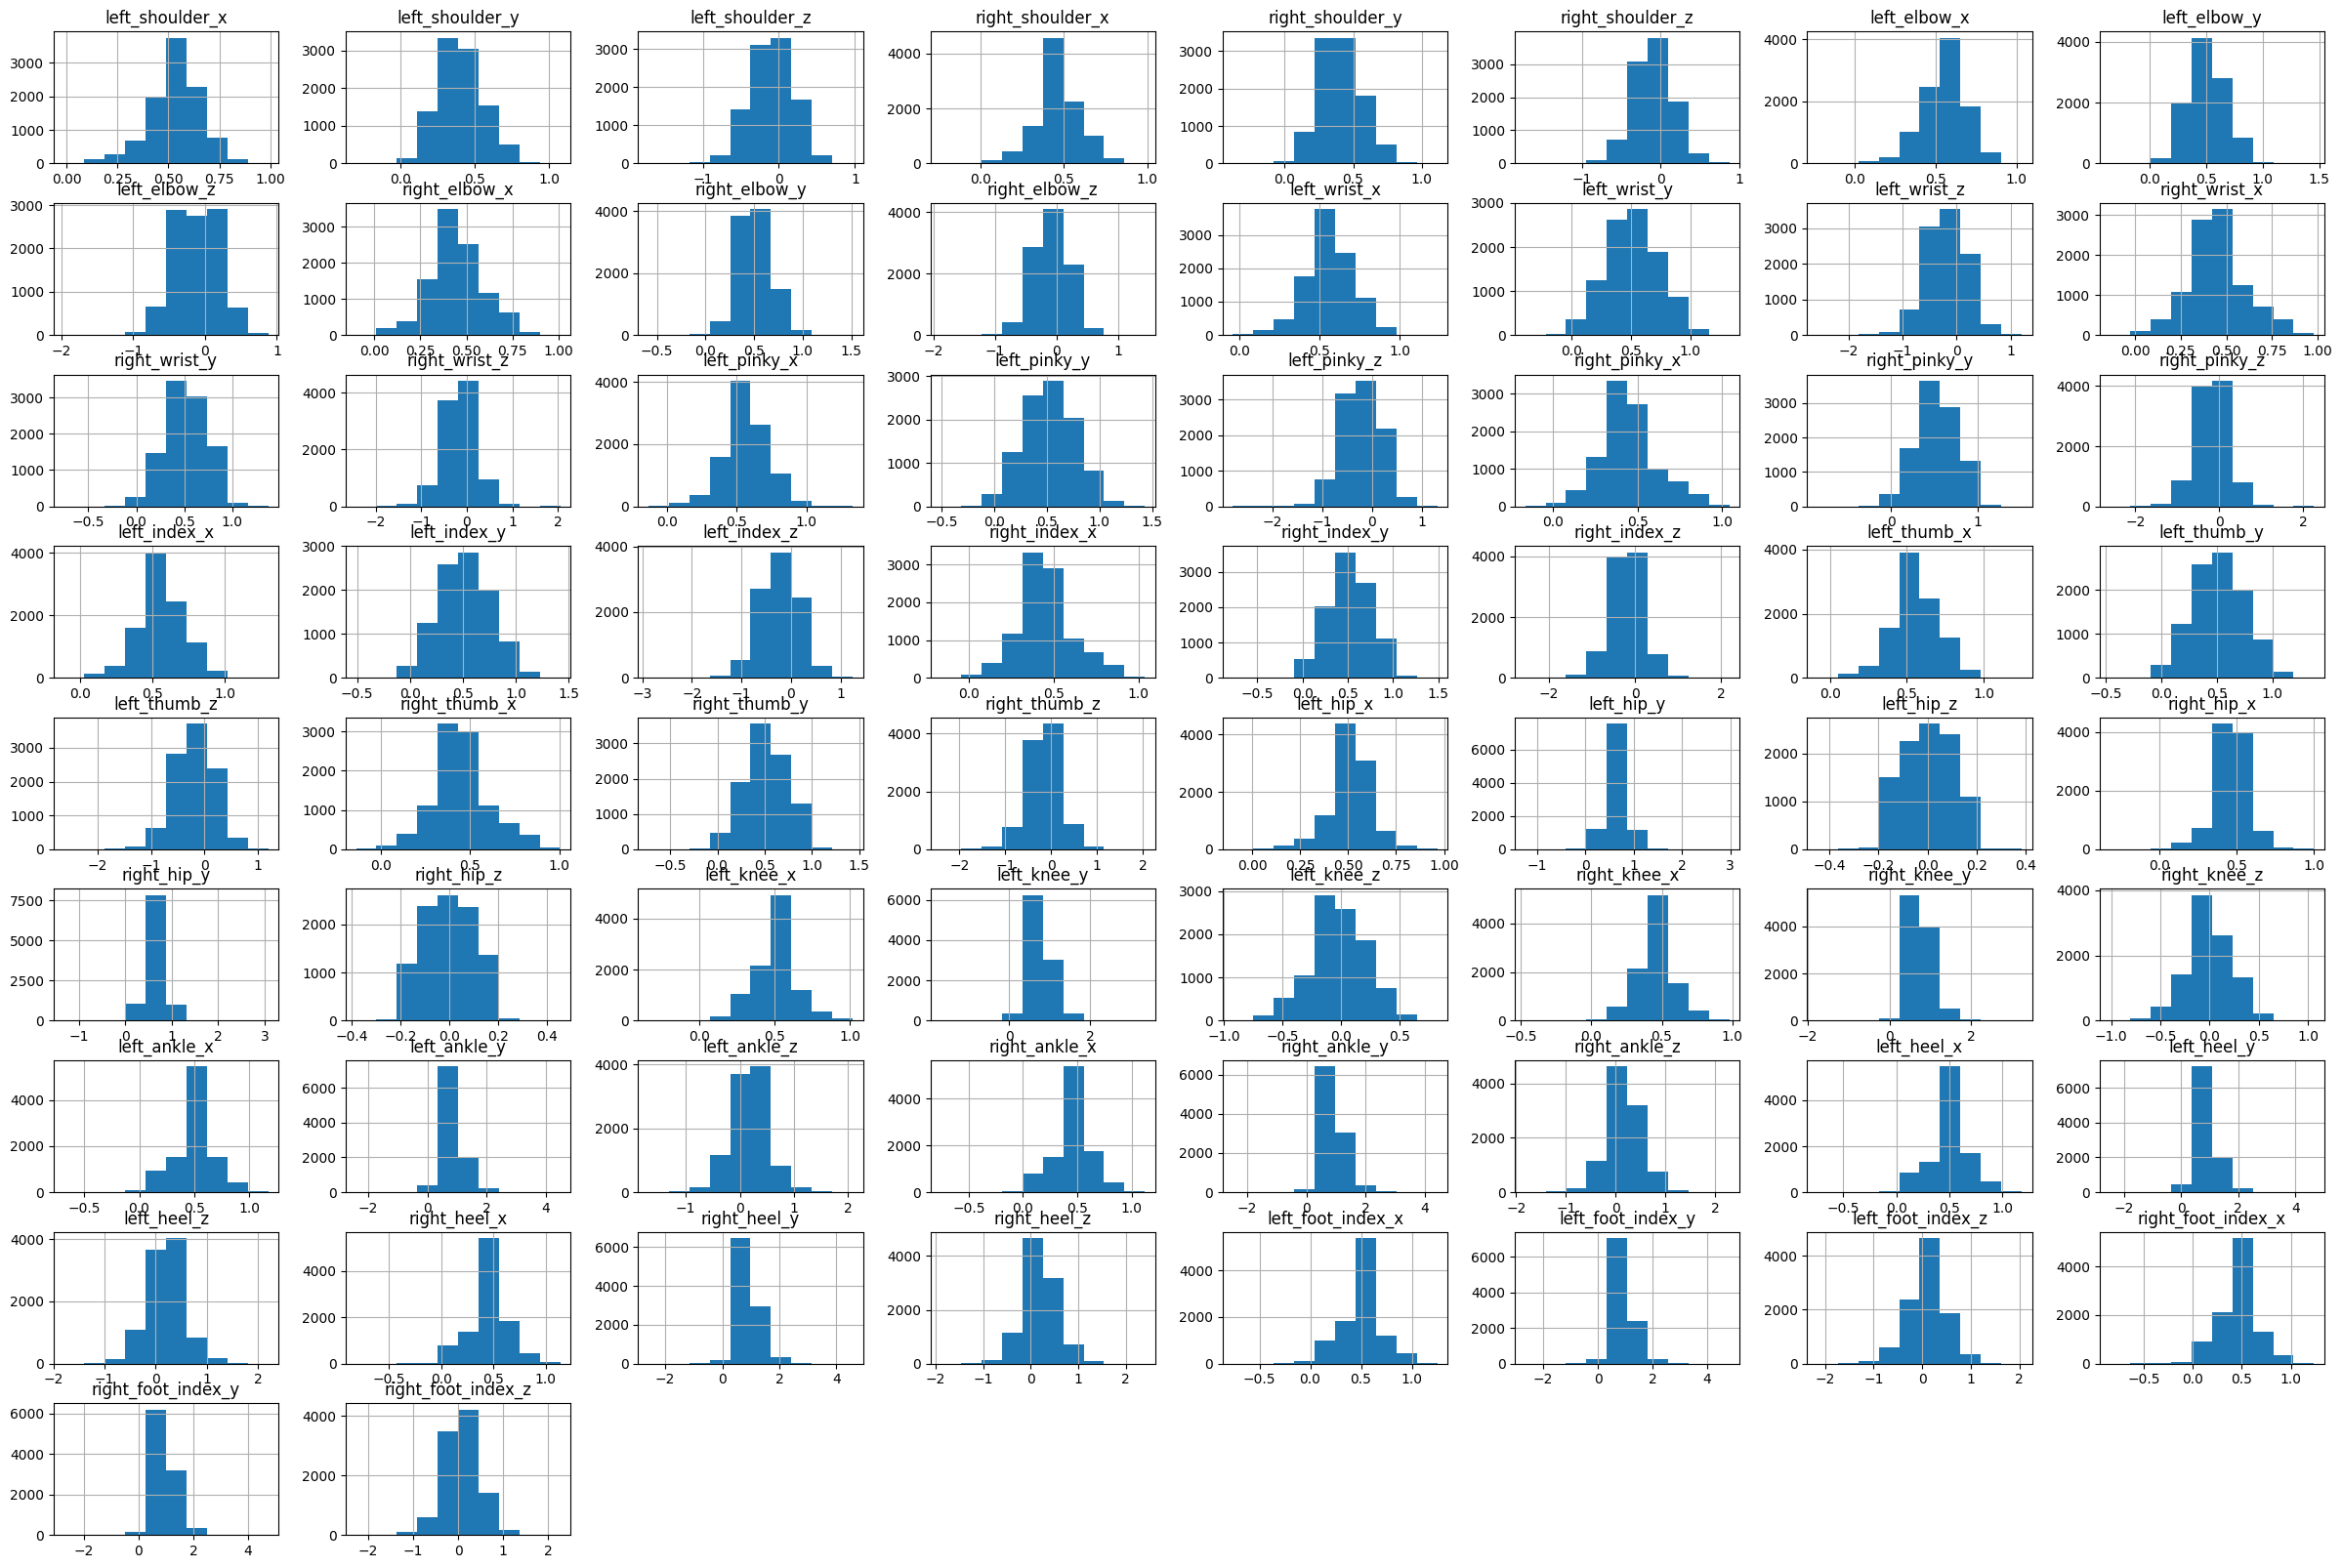

In [50]:
X.hist(figsize=(30,20))

**y_axis features tends to have higher variance, and it makes sense as the user is moving in y-axis while working out**

**Features with less variance might be less useful for example, right_knee_x does have much variance, as most values are centered around the mean**

**5. Feature Engineering**

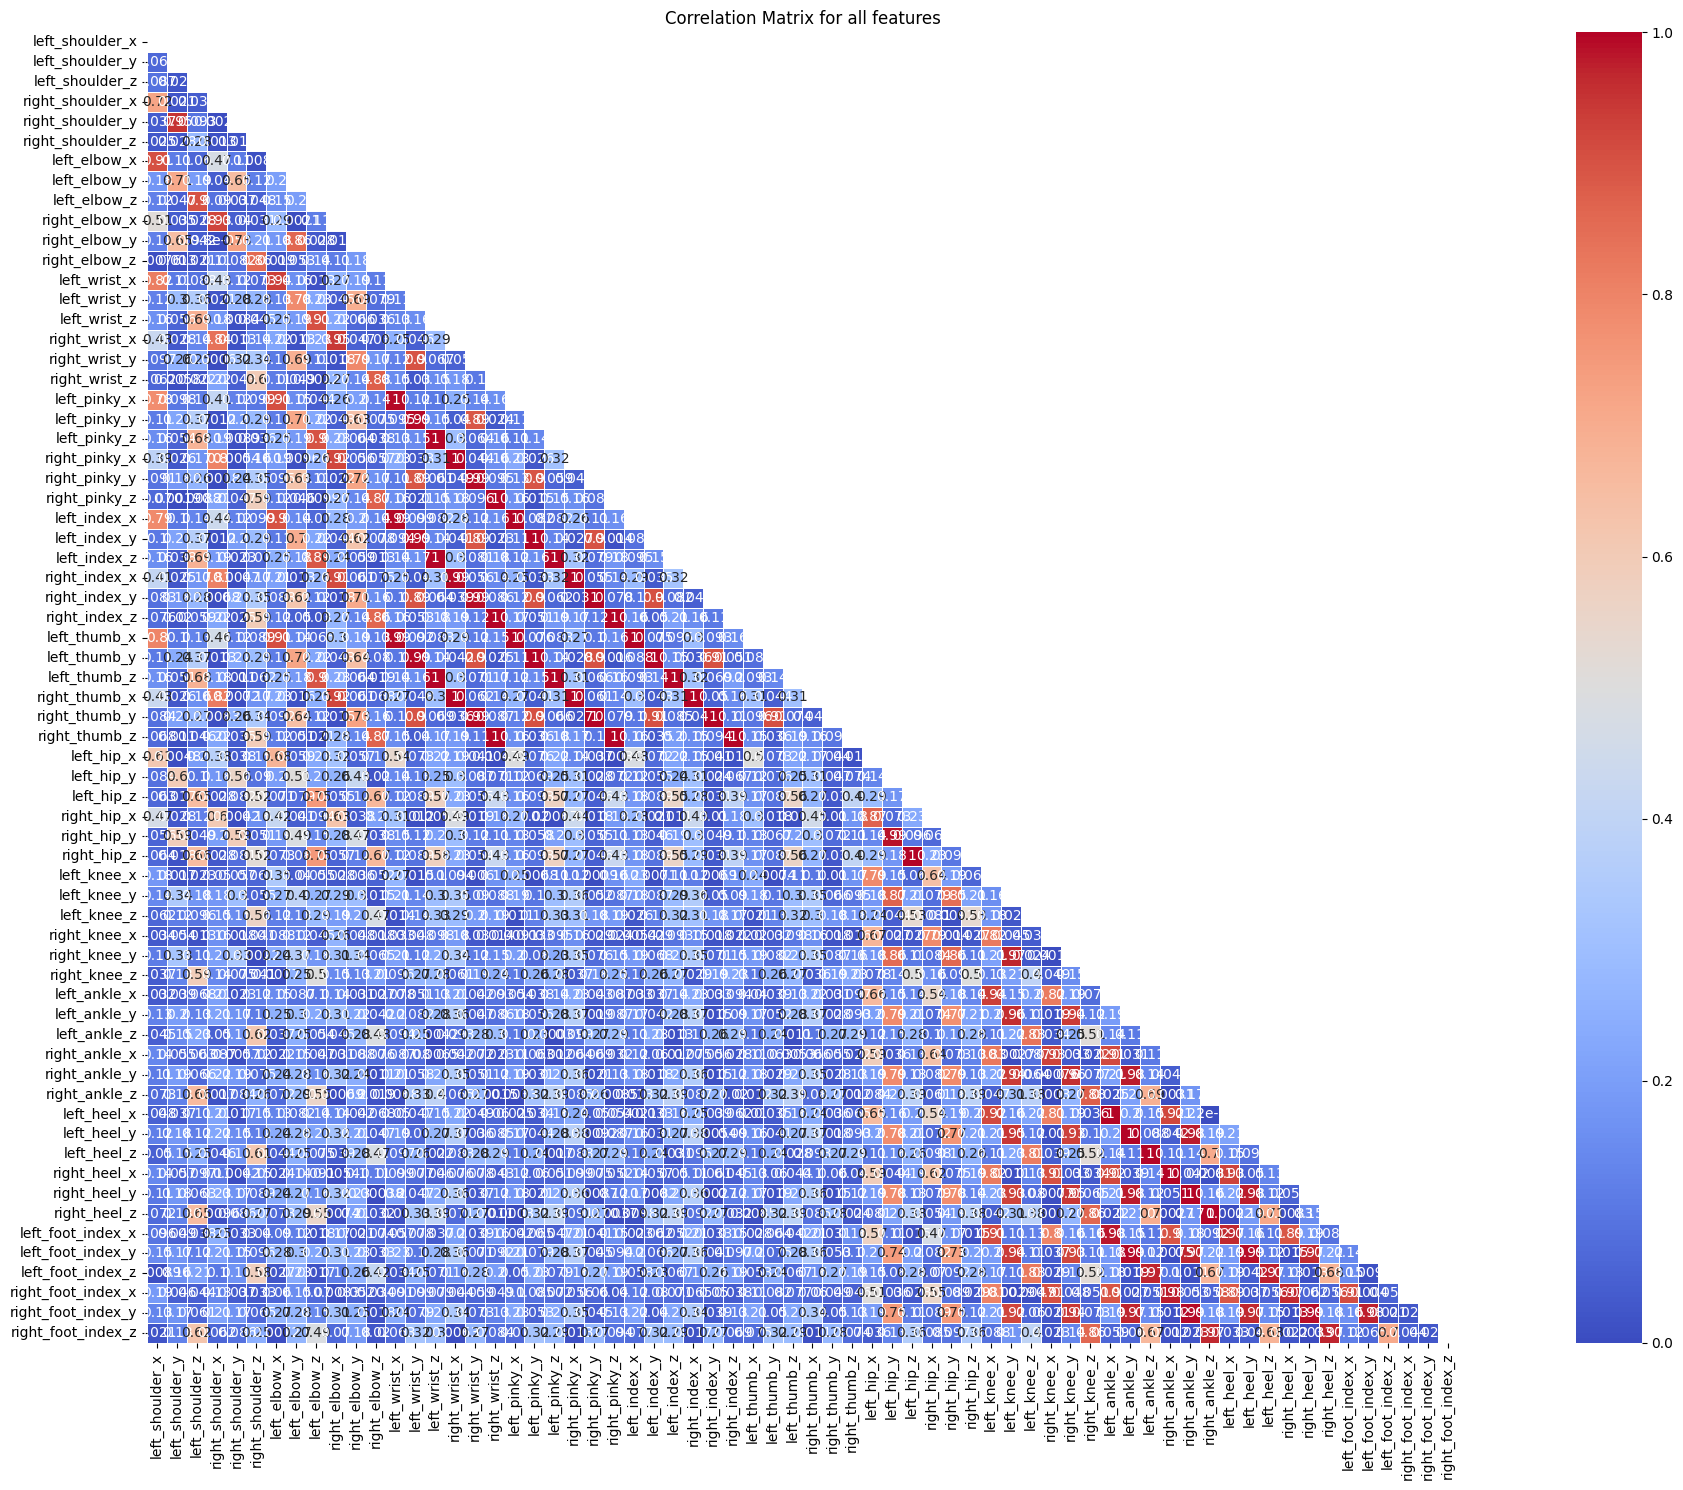

In [82]:
corr_matrix = X.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(24, 15))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', 
            vmax=1.0, vmin=0, center=0.5,
            square=True, linewidths=.5, annot=True).set(title='Correlation Matrix for all features')
plt.tight_layout()
plt.show()

**Features that are highly correlated , one of them should be removed**
- it is better to remove the one that is the least correlated with y_target

In [83]:
correlation_threshold = 0.8
columns_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            columns_to_drop.append(corr_matrix.columns[j])
            print(f"High Correlation between {corr_matrix.columns[i]} and {corr_matrix.columns[j]} --> {corr_matrix.iloc[i, j]:.2f}")

columns_to_drop = list(set(columns_to_drop))
print(f"Columns to drop: {columns_to_drop}")
print(f"number of columns to drop: {len(columns_to_drop)}")

High Correlation between left_shoulder_x and left_elbow_x --> 0.91
High Correlation between left_shoulder_x and left_wrist_x --> 0.82
High Correlation between left_shoulder_y and right_shoulder_y --> 0.95
High Correlation between left_shoulder_z and left_elbow_z --> 0.90
High Correlation between right_shoulder_x and right_elbow_x --> 0.93
High Correlation between right_shoulder_x and right_wrist_x --> 0.84
High Correlation between right_shoulder_x and right_pinky_x --> 0.80
High Correlation between right_shoulder_x and right_index_x --> 0.81
High Correlation between right_shoulder_x and right_thumb_x --> 0.82
High Correlation between right_shoulder_z and right_elbow_z --> 0.86
High Correlation between left_elbow_x and left_wrist_x --> 0.94
High Correlation between left_elbow_x and left_pinky_x --> 0.91
High Correlation between left_elbow_x and left_index_x --> 0.90
High Correlation between left_elbow_x and left_thumb_x --> 0.91
High Correlation between left_elbow_y and right_elbow_y --

In [84]:
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: ['left_wrist_z', 'right_hip_x', 'right_elbow_y', 'right_index_y', 'left_knee_y', 'right_elbow_x', 'left_ankle_x', 'left_thumb_z', 'left_foot_index_z', 'left_thumb_y', 'right_thumb_x', 'right_heel_y', 'right_pinky_z', 'left_heel_x', 'left_elbow_x', 'left_index_y', 'right_index_x', 'left_ankle_y', 'right_ankle_y', 'right_wrist_y', 'right_hip_y', 'right_foot_index_z', 'right_pinky_y', 'left_index_z', 'left_pinky_x', 'right_heel_z', 'right_ankle_z', 'left_pinky_y', 'right_index_z', 'left_heel_z', 'right_hip_z', 'right_foot_index_x', 'left_thumb_x', 'right_shoulder_y', 'right_pinky_x', 'left_index_x', 'left_elbow_z', 'right_wrist_z', 'right_knee_y', 'right_foot_index_y', 'left_wrist_x', 'right_heel_x', 'left_pinky_z', 'right_thumb_y', 'left_foot_index_y', 'left_ankle_z', 'right_thumb_z', 'right_ankle_x', 'left_heel_y', 'right_wrist_x', 'left_foot_index_x', 'right_elbow_z', 'right_knee_x']


**53 Columns to drop**

In [85]:
X_feature_eng=X.copy()
X_feature_eng=X_feature_eng.drop(columns=columns_to_drop)

X_val_feature_eng=X_val.copy()
X_val_feature_eng=X_val_feature_eng.drop(columns=columns_to_drop)

In [54]:
X_feature_eng

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z
0,0.583320,0.335803,-0.211788,0.474581,0.108747,0.464159,0.307539,0.547455,0.641530,-0.095243,0.539590,-0.127975,0.090467
1,0.678642,0.440078,-0.612812,0.515083,-0.117026,0.741001,0.978577,0.580776,0.828929,-0.141738,0.544284,-0.055685,0.346947
2,0.696936,0.424849,-0.546435,0.541481,0.056073,0.727965,0.973181,0.600422,0.864101,-0.148629,0.566692,-0.086789,0.341052
3,0.735158,0.421398,-0.445230,0.567720,-0.020384,0.693185,0.747719,0.632823,0.816128,-0.117610,0.563894,-0.058747,0.267101
4,0.742088,0.427873,-0.402229,0.569172,0.023216,0.711357,0.644841,0.635021,0.861775,-0.099939,0.595404,0.007690,0.415382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0.698142,0.380448,-0.096491,0.496765,-0.026425,0.617216,0.764956,0.685580,0.812779,0.002855,0.719564,0.217111,0.187858
9981,0.511855,0.159490,0.057961,0.516530,0.497257,0.237316,0.214935,0.535939,0.393127,-0.127129,0.509501,-0.226755,-0.008039
9982,0.510580,0.164275,0.149101,0.515193,0.545190,0.225487,0.224627,0.544801,0.394392,-0.115017,0.512938,-0.240078,-0.084052
9983,0.311740,0.340650,0.211491,0.180325,-0.371719,0.445237,0.437986,0.274574,0.544494,0.191648,0.265033,0.220201,-0.218878


In [55]:
X.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'right_elbow_x',
       'right_elbow_y', 'right_elbow_z', 'left_wrist_x', 'left_wrist_y',
       'left_wrist_z', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'left_pinky_x', 'left_pinky_y', 'left_pinky_z', 'right_pinky_x',
       'right_pinky_y', 'right_pinky_z', 'left_index_x', 'left_index_y',
       'left_index_z', 'right_index_x', 'right_index_y', 'right_index_z',
       'left_thumb_x', 'left_thumb_y', 'left_thumb_z', 'right_thumb_x',
       'right_thumb_y', 'right_thumb_z', 'left_hip_x', 'left_hip_y',
       'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'right_knee_x',
       'right_knee_y', 'right_knee_z', 'left_ankle_x', 'left_ankle_y',
       'left_ankle_z', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z',
       'lef

In [86]:
X_feature_eng.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z',
       'right_shoulder_x', 'right_shoulder_z', 'left_elbow_y', 'left_wrist_y',
       'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_knee_x', 'left_knee_z',
       'right_knee_z'],
      dtype='object')

1. four x_axis features were used
2. four y_axis features were used
3. five z_axis features were used

interesting most of the features were on the left
what if we can remove for example the right_knee_z as well as right_shoulder_z, and only keep the left features

In [17]:
"""
This function takes both training_dataset
then it will show the result for each one of the models

1-Accuracy
2-Classification Report
3-Confusion Matrix
4-Precision, Recall, F1-Score
5-Time Taken to train
6-Features used to build the model

"""

def train_model(model,param_grid,X_train,y_train,X_test,y_test,apply_smote=False):
    if apply_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=2,
        scoring='accuracy'
    )
    grid_search.fit(X_train,y_train)
    y_predictions=grid_search.predict(X_test)
    accuracy = accuracy_score(y_test,y_predictions)
    report = classification_report(y_test,y_predictions)
    confusion_matrix_values = confusion_matrix(y_test,y_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_values, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=Workout_labels,
                yticklabels=Workout_labels)

    # Add labels, title, and axis ticks
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')

    # Show the plot
    plt.show()
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", (accuracy*100),"%")
    print("Classification Report:\n", report)
    return grid_search.best_estimator_ 

**Percision , Recall ,F1-score will be used, marco weighting will be used as we have imbalanced classes**

**Random Forest**

In [18]:
param_grid = {
    'n_estimators': [1000],
    'max_depth': [20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None]
}



**PCA - Feature Engineering**
 - We should not perform PCA on test and train data sets separately according to https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

In [35]:
#combining training and testing dataset

train_and_test_dataset = pd.concat([training_dataset, testing_dataset], axis=0, ignore_index=True)
train_and_test_dataset

,Unnamed: 0,image,label,muscle group,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,...,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index,WorkoutLabel
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.5833196, 0.33580318, -0.21178767]","[0.47458136, 0.34345636, 0.10874679]","[0.57977086, 0.46415919, -0.47176945]","[0.43594614, 0.45717493, 0.02466545]","[0.56032622, 0.30753931, -0.67780912]","[0.41948569, 0.34880683, -0.22920853]",...,"[0.4949941, 0.63739824, 0.0950451]","[0.5395903, 0.87229109, -0.12797548]","[0.47882056, 0.83482677, 0.09046733]","[0.57926077, 1.00452185, 0.16046034]","[0.49489287, 1.00004327, 0.30162144]","[0.59262854, 1.01897967, 0.18326579]","[0.50915658, 1.01278317, 0.31755036]","[0.54145193, 1.08223307, 0.05403144]","[0.45173571, 1.07756639, 0.19764052]",barbell bicep curl
1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.67864227, 0.44007847, -0.61281157]","[0.51508331, 0.35392922, -0.11702637]","[0.67732167, 0.74100083, -0.5522756]","[0.4897728, 0.60025042, 0.07598472]","[0.61691177, 0.97857672, -0.45322162]","[0.45017678, 0.78440237, 0.03856679]",...,"[0.51025462, 0.78014213, 0.14235109]","[0.54428422, 1.10362673, -0.05568497]","[0.50352174, 1.00672913, 0.34694716]","[0.55549401, 1.30219674, 0.41977754]","[0.49522635, 1.25586081, 0.75884837]","[0.57307285, 1.33680952, 0.45630074]","[0.49889699, 1.29905045, 0.79597855]","[0.4998886, 1.36149573, 0.31691936]","[0.43795371, 1.30396044, 0.67758882]",barbell bicep curl
2,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.69693595, 0.42484942, -0.54643494]","[0.5414809, 0.3626397, 0.05607326]","[0.69159269, 0.72796458, -0.47757795]","[0.50304294, 0.59366345, 0.26994297]","[0.60007864, 0.97318113, -0.33487263]","[0.4317157, 0.74968982, 0.221766]",...,"[0.5276618, 0.81493449, 0.149377]","[0.56669152, 1.1428107, -0.0867893]","[0.51520008, 1.03812408, 0.34105164]","[0.56008267, 1.35045171, 0.33445409]","[0.50417012, 1.30311942, 0.71437806]","[0.57579422, 1.38513505, 0.36577019]","[0.50641191, 1.34992421, 0.74796361]","[0.49819234, 1.41932583, 0.23056105]","[0.4493897, 1.35124731, 0.64058065]",barbell bicep curl
3,3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.73515791, 0.42139792, -0.44522965]","[0.56772029, 0.33572495, -0.02038416]","[0.71257848, 0.69318485, -0.42954224]","[0.52117139, 0.53452033, 0.11454836]","[0.57872039, 0.74771893, -0.41099623]","[0.42096221, 0.56698191, -0.03880053]",...,"[0.55607569, 0.75885957, 0.11806498]","[0.56389433, 1.0513351, -0.05874701]","[0.52235311, 0.98940063, 0.26710114]","[0.62840301, 1.19985843, 0.27531052]","[0.5560208, 1.18725681, 0.54255092]","[0.65617859, 1.22073638, 0.30534539]","[0.57421941, 1.22636902, 0.57130569]","[0.59127408, 1.28368247, 0.25454187]","[0.49074861, 1.25892329, 0.53612298]",barbell bicep curl
4,4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.74208808, 0.42787308, -0.40222892]","[0.56917161, 0.36541611, 0.02321619]","[0.71893549, 0.71135747, -0.33957008]","[0.51690018, 0.55520439, -0.06789815]","[0.59105009, 0.64484054, -0.20590726]","[0.42900956, 0.49844888, -0.50125289]",...,"[0.54234886, 0.81430739, 0.10102117]","[0.59540391, 1.14598823, 0.00768962]","[0.50538111, 1.11401439, 0.41538179]","[0.57525152, 1.37389243, 0.27296644]","[0.50017542, 1.35379958, 0.76125646]","[0.58630925, 1.4121573, 0.29041424]","[0.50934988, 1.40208185, 0.79376227]","[0.51287192, 1.45682466, 0.128802]","[0.43914852, 1.42183828, 0.67137176]",barbell bicep curl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,1397,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21,5,"[0.69814205, 0.38044816, -0.09649066]","[0.4967646, 0.42876548, -0.02642469]","[0.74158657, 0.61721599, -0.00643489]","[0.46550187, 0.65274161, 0.02646272]","[0.73340917, 0.76495641, -0.03126102]","[0.46158457, 0.80461067, -0.06425162]",...,"[0.6179446, 0.82556838, -0.00245162

In [ ]:
# train_and_test_dataset.drop(columns={'image','muscle group','WorkoutLabel','Unnamed: 0'},inplace=True)

In [ ]:
features_to_split=['left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index',
       'left_thumb', 'right_thumb', 'left_hip', 'right_hip', 'left_knee',
       'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
       'left_foot_index', 'right_foot_index']

training_dataset_preprocessed=Preprocess_data(train_and_test_dataset,features_to_split)
X, y = Return_X_y(training_dataset_preprocessed,['label','muscle group','WorkoutLabel','image','Unnamed: 0'])

X_hierarchical_preprocessed = Preprocess_data(X_hierarchical,features_to_split)
X_hierarchical_predict, y = Return_X_y(X_hierarchical_preprocessed,['label','muscle group','WorkoutLabel','image','Unnamed: 0'])

NameError: name 'train_and_test_dataset' is not defined

In [37]:
X.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'right_elbow_x',
       'right_elbow_y', 'right_elbow_z', 'left_wrist_x', 'left_wrist_y',
       'left_wrist_z', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'left_pinky_x', 'left_pinky_y', 'left_pinky_z', 'right_pinky_x',
       'right_pinky_y', 'right_pinky_z', 'left_index_x', 'left_index_y',
       'left_index_z', 'right_index_x', 'right_index_y', 'right_index_z',
       'left_thumb_x', 'left_thumb_y', 'left_thumb_z', 'right_thumb_x',
       'right_thumb_y', 'right_thumb_z', 'left_hip_x', 'left_hip_y',
       'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'right_knee_x',
       'right_knee_y', 'right_knee_z', 'left_ankle_x', 'left_ankle_y',
       'left_ankle_z', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z',
       'lef

In [ ]:
pca = PCA(0.99)
#tells PCA use 99% of useful features, it doesn't say i want 2 dimensions but rather 95% of information use it
X_pca=pca.fit_transform(X)

In [48]:
X_pca.shape #we are only using 9 features

(9985, 16)

In [49]:
pca.explained_variance_ratio_

array([0.28141682, 0.18348794, 0.15130565, 0.13119619, 0.08022398,
       0.05220911, 0.03879859, 0.01836583, 0.01570361, 0.01484489,
       0.00701413, 0.00510481, 0.0038786 , 0.00338538, 0.00232716,
       0.00178883])

In [50]:
pca.n_components_

16

In [52]:
X_train_pca,X_test_pca, y_train, y_test=train_test_split(X_pca, y , test_size=0.2, random_state=30)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


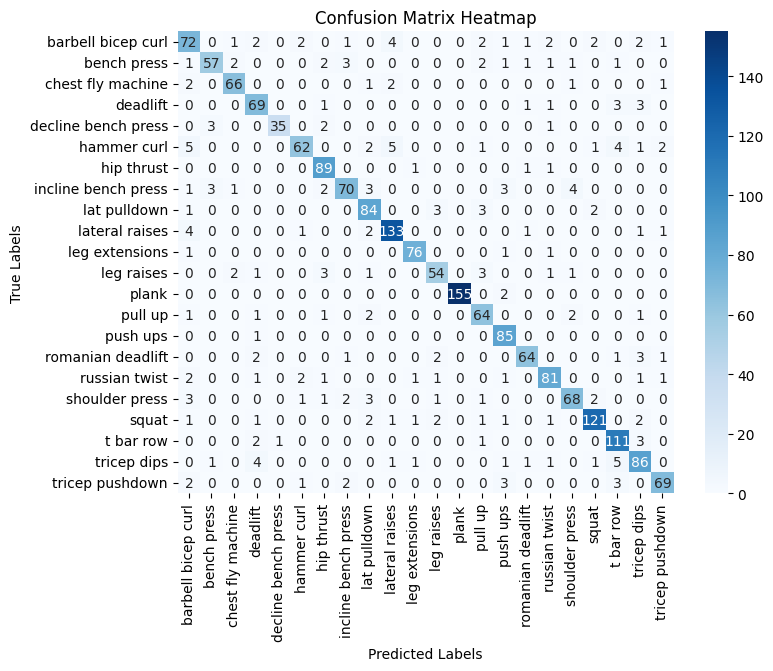

Best Parameters: {'max_depth': 20, 'n_estimators': 1000}
Accuracy: 88.6830245368052 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        93
           1       0.89      0.79      0.84        72
           2       0.92      0.90      0.91        73
           3       0.82      0.88      0.85        78
           4       0.97      0.85      0.91        41
           5       0.90      0.75      0.82        83
           6       0.87      0.97      0.92        92
           7       0.89      0.80      0.84        87
           8       0.84      0.90      0.87        93
           9       0.91      0.93      0.92       143
          10       0.95      0.96      0.96        79
          11       0.86      0.82      0.84        66
          12       1.00      0.99      0.99       157
          13       0.82      0.89      0.85        72
          14       0.86      0.99      0.92        86
          15       0.91  

In [58]:
random_tree_model = RandomForestClassifier(random_state=42)
best_model=train_model(random_tree_model,param_grid,X_train_pca,y_train,X_test_pca,y_test)

**First PCA component used 28% useful information/variance, and second one used 18%, and so one, it decreases**

In [24]:
X_train.iloc[0]

left_shoulder_x       0.583320
left_shoulder_y       0.335803
left_shoulder_z      -0.211788
right_shoulder_x      0.474581
right_shoulder_y      0.343456
                        ...   
left_foot_index_y     1.082233
left_foot_index_z     0.054031
right_foot_index_x    0.451736
right_foot_index_y    1.077566
right_foot_index_z    0.197641
Name: 0, Length: 66, dtype: float64

**Multilayer Perceptron**

In [140]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  
    # 'activation': ['relu', 'tanh'],  
    # 'solver': ['adam', 'sgd'],  
    # 'alpha': [0.0001, 0.001, 0.01],  
    # 'learning_rate': ['constant', 'adaptive'],  
    # 'max_iter': [200, 500, 1000]  
}

**Multilayer Perceptron with no feature engineering**

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\DELL\Desktop\Advanced_AI\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


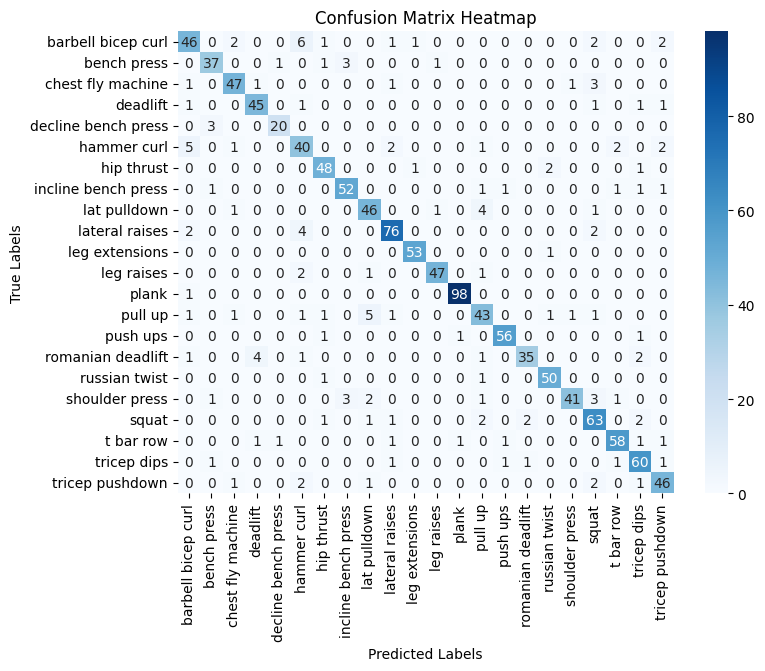

Best Parameters: {'hidden_layer_sizes': (100,)}
Accuracy: 88.27751196172248 %
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        61
           1       0.86      0.86      0.86        43
           2       0.89      0.87      0.88        54
           3       0.88      0.90      0.89        50
           4       0.91      0.87      0.89        23
           5       0.70      0.75      0.73        53
           6       0.89      0.92      0.91        52
           7       0.90      0.90      0.90        58
           8       0.82      0.87      0.84        53
           9       0.90      0.90      0.90        84
          10       0.96      0.98      0.97        54
          11       0.96      0.92      0.94        51
          12       0.98      0.99      0.98        99
          13       0.78      0.77      0.77        56
          14       0.95      0.95      0.95        59
          15       0.92      0.80

In [141]:
mlp_model = MLPClassifier(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

train_model(mlp_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

**Multilayer Perceptron with feature engineering**

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\DELL\Desktop\Advanced_AI\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


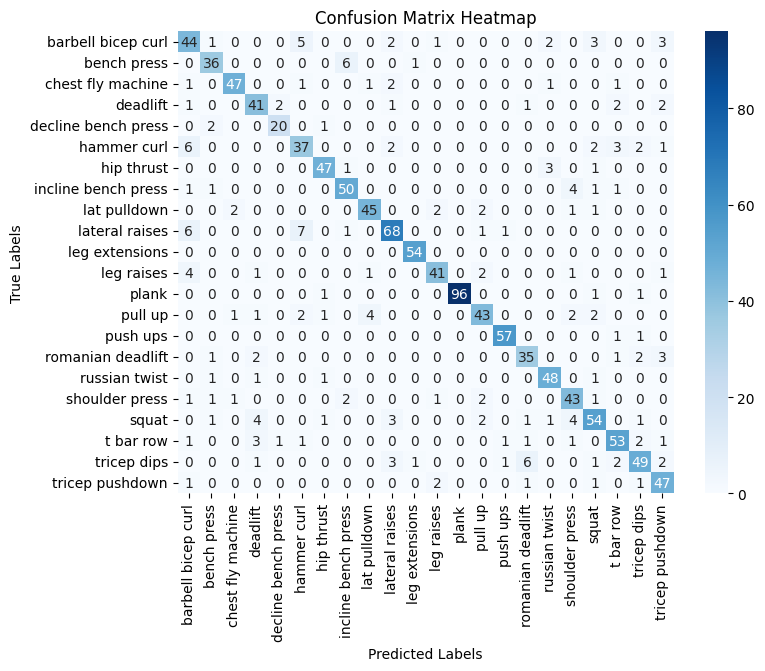

Best Parameters: {'hidden_layer_sizes': (100,)}
Accuracy: 84.13078149920256 %
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69        61
           1       0.82      0.84      0.83        43
           2       0.92      0.87      0.90        54
           3       0.76      0.82      0.79        50
           4       0.87      0.87      0.87        23
           5       0.70      0.70      0.70        53
           6       0.90      0.90      0.90        52
           7       0.83      0.86      0.85        58
           8       0.88      0.85      0.87        53
           9       0.84      0.81      0.82        84
          10       0.96      1.00      0.98        54
          11       0.87      0.80      0.84        51
          12       1.00      0.97      0.98        99
          13       0.83      0.77      0.80        56
          14       0.95      0.97      0.96        59
          15       0.78      0.80

In [142]:
mlp_model = MLPClassifier(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feature_eng)
X_test_scaled = scaler.fit_transform(X_test_feature_eng)

train_model(mlp_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

**Support Vector Machines**

In [145]:
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto'],  
}

**Support Vector Machines with no feature engineering**

Fitting 3 folds for each of 12 candidates, totalling 36 fits


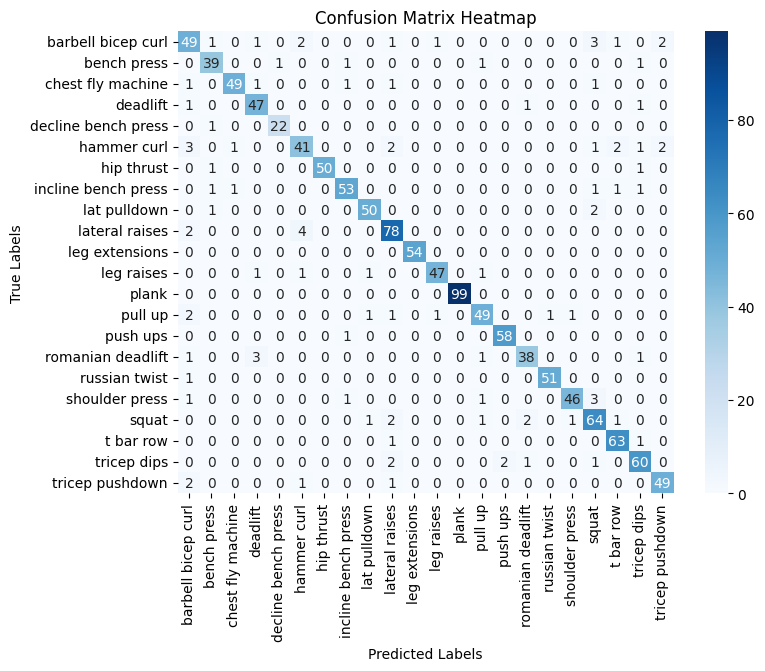

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 92.18500797448166 %
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        61
           1       0.89      0.91      0.90        43
           2       0.96      0.91      0.93        54
           3       0.89      0.94      0.91        50
           4       0.96      0.96      0.96        23
           5       0.84      0.77      0.80        53
           6       1.00      0.96      0.98        52
           7       0.93      0.91      0.92        58
           8       0.94      0.94      0.94        53
           9       0.88      0.93      0.90        84
          10       1.00      1.00      1.00        54
          11       0.96      0.92      0.94        51
          12       1.00      1.00      1.00        99
          13       0.91      0.88      0.89        56
          14       0.97      0.98      0.97        59
          15       

In [146]:
svc_model = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

train_model(svc_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

**Support Vector Machines with feature engineering**

Fitting 3 folds for each of 12 candidates, totalling 36 fits


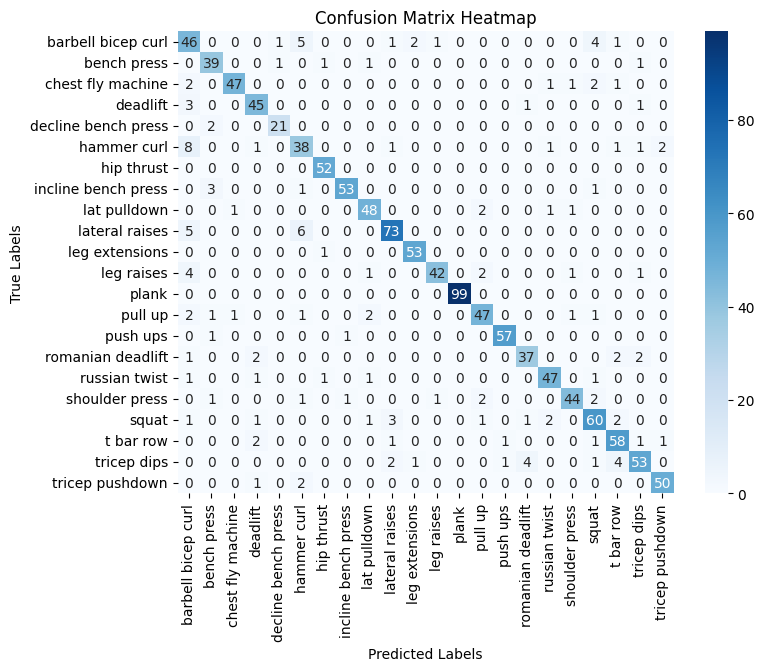

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 88.43700159489633 %
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.75      0.69        61
           1       0.83      0.91      0.87        43
           2       0.96      0.87      0.91        54
           3       0.85      0.90      0.87        50
           4       0.91      0.91      0.91        23
           5       0.70      0.72      0.71        53
           6       0.95      1.00      0.97        52
           7       0.96      0.91      0.94        58
           8       0.89      0.91      0.90        53
           9       0.90      0.87      0.88        84
          10       0.95      0.98      0.96        54
          11       0.95      0.82      0.88        51
          12       1.00      1.00      1.00        99
          13       0.87      0.84      0.85        56
          14       0.97      0.97      0.97        59
          15       

In [147]:
svc_model = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feature_eng)
X_test_scaled = scaler.fit_transform(X_test_feature_eng)

train_model(svc_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

**Upsampling the training dataset, then comparing the results to above**
- Applying SMOTE to make sure all classes are evenly distributed

**Notes**
1. use t-test rather than train_Test, null hypothesis, hypothesis
2. PCA does not make sense a lot here
3. does all workouts have to be symmetrical ,most of features on left selected by feature engineering
4. for last one use kernel density function with height, average value for specific features for specific height group
if someone with same height group we compare the difference between them and the group
5. search if google mediapipe works well for both gender if there is any research
6. maybe use model to classify height and gender of people
7. try to use ensemble
8. understand which works out have to be symmetrical, also which workouts are similar
9. for similar workouts use hierarchical classification
10. understand percision,recall differences for single classes
11. identify similar workouts
12. check feature_importance by random forest
13. 90% is better than 92% with less features because it is more explainable, cheaper,less energy
14. have the preprocessing and all functions in outside file like x.py

In [56]:
pca = PCA(0.99)
#tells PCA use 99% of useful features, it doesn't say i want 2 dimensions but rather 95% of information use it
X_pca=pca.fit_transform(X)
X_val_pca_feature_eng=pca.transform(X_val)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


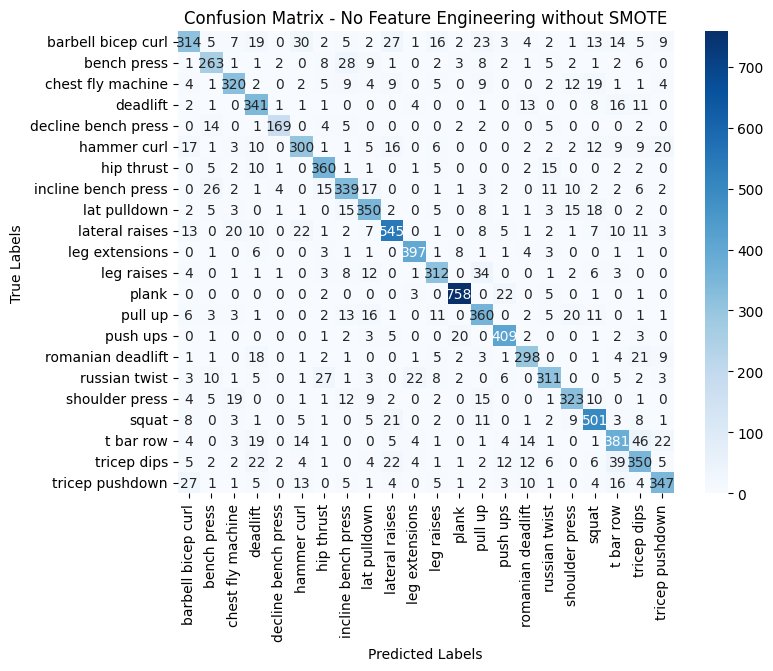


Configuration: No Feature Engineering without SMOTE
Best Parameters: {'n_estimators': 200}
Accuracy: 80.60090135202805 %
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68       504
           1       0.76      0.76      0.76       346
           2       0.82      0.78      0.80       409
           3       0.72      0.85      0.78       400
           4       0.93      0.83      0.88       204
           5       0.76      0.72      0.74       416
           6       0.82      0.88      0.85       407
           7       0.76      0.76      0.76       444
           8       0.78      0.81      0.79       432
           9       0.83      0.81      0.82       669
          10       0.91      0.93      0.92       429
          11       0.80      0.80      0.80       389
          12       0.95      0.96      0.95       792
          13       0.73      0.79      0.76       456
          14       0.87      0.91      0.89

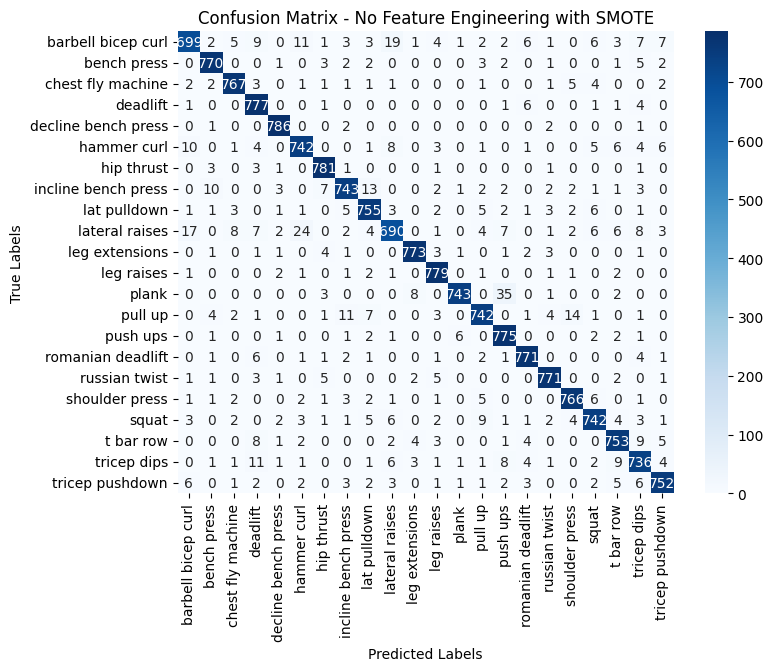


Configuration: No Feature Engineering with SMOTE
Best Parameters: {'n_estimators': 200}
Accuracy: 95.34550045913683 %
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       792
           1       0.96      0.97      0.97       792
           2       0.97      0.97      0.97       792
           3       0.93      0.98      0.96       792
           4       0.98      0.99      0.99       792
           5       0.94      0.94      0.94       792
           6       0.96      0.99      0.98       792
           7       0.95      0.94      0.94       792
           8       0.94      0.95      0.95       792
           9       0.93      0.87      0.90       792
          10       0.98      0.98      0.98       792
          11       0.96      0.98      0.97       792
          12       0.99      0.94      0.96       792
          13       0.95      0.94      0.94       792
          14       0.92      0.98      0.95   

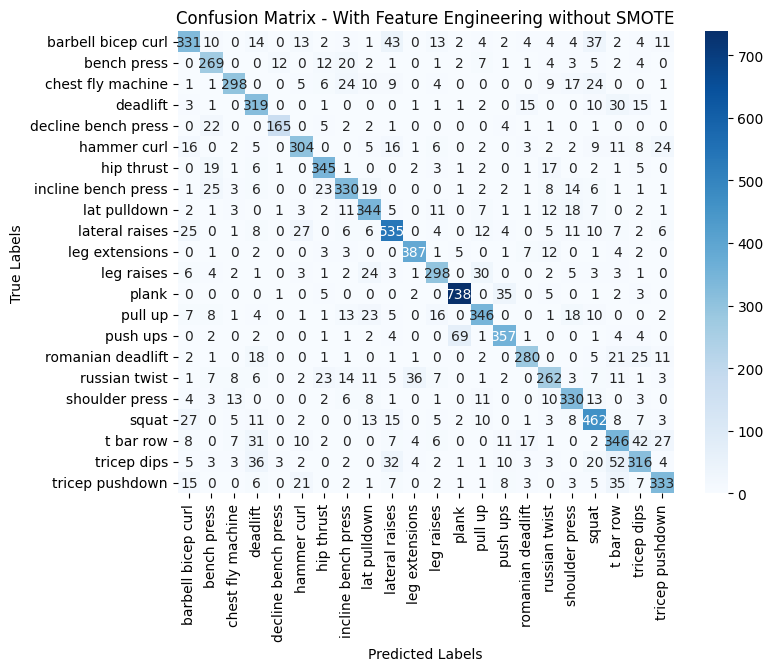


Configuration: With Feature Engineering without SMOTE
Best Parameters: {'n_estimators': 200}
Accuracy: 77.06559839759639 %
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69       504
           1       0.71      0.78      0.74       346
           2       0.86      0.73      0.79       409
           3       0.67      0.80      0.73       400
           4       0.90      0.81      0.85       204
           5       0.77      0.73      0.75       416
           6       0.79      0.85      0.82       407
           7       0.75      0.74      0.75       444
           8       0.73      0.80      0.76       432
           9       0.78      0.80      0.79       669
          10       0.88      0.90      0.89       429
          11       0.78      0.77      0.77       389
          12       0.90      0.93      0.91       792
          13       0.78      0.76      0.77       456
          14       0.82      0.80      0.

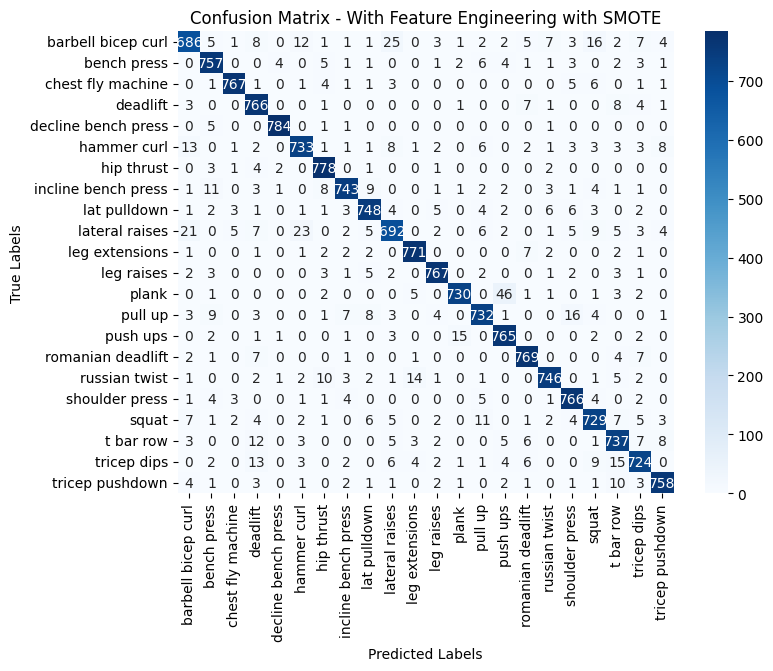


Configuration: With Feature Engineering with SMOTE
Best Parameters: {'n_estimators': 200}
Accuracy: 94.39853076216713 %
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       792
           1       0.94      0.96      0.95       792
           2       0.98      0.97      0.97       792
           3       0.91      0.97      0.94       792
           4       0.99      0.99      0.99       792
           5       0.94      0.93      0.93       792
           6       0.95      0.98      0.97       792
           7       0.96      0.94      0.95       792
           8       0.95      0.94      0.95       792
           9       0.91      0.87      0.89       792
          10       0.96      0.97      0.97       792
          11       0.96      0.97      0.97       792
          12       0.97      0.92      0.95       792
          13       0.94      0.92      0.93       792
          14       0.92      0.97      0.94 

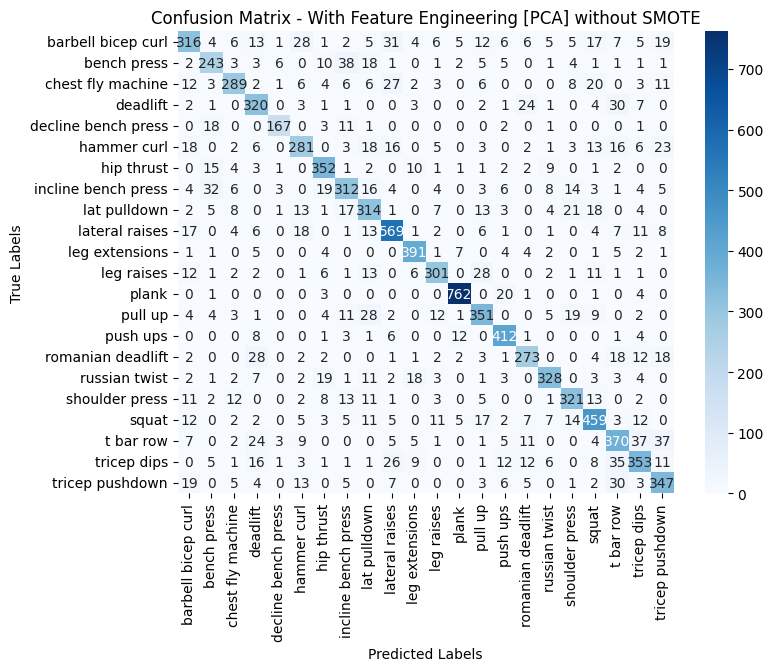


Configuration: With Feature Engineering [PCA] without SMOTE
Best Parameters: {'n_estimators': 200}
Accuracy: 78.4276414621933 %
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67       504
           1       0.72      0.70      0.71       346
           2       0.82      0.71      0.76       409
           3       0.71      0.80      0.75       400
           4       0.91      0.82      0.86       204
           5       0.73      0.68      0.70       416
           6       0.80      0.86      0.83       407
           7       0.72      0.70      0.71       444
           8       0.67      0.73      0.70       432
           9       0.81      0.85      0.83       669
          10       0.87      0.91      0.89       429
          11       0.83      0.77      0.80       389
          12       0.96      0.96      0.96       792
          13       0.76      0.77      0.77       456
          14       0.84      0.92   

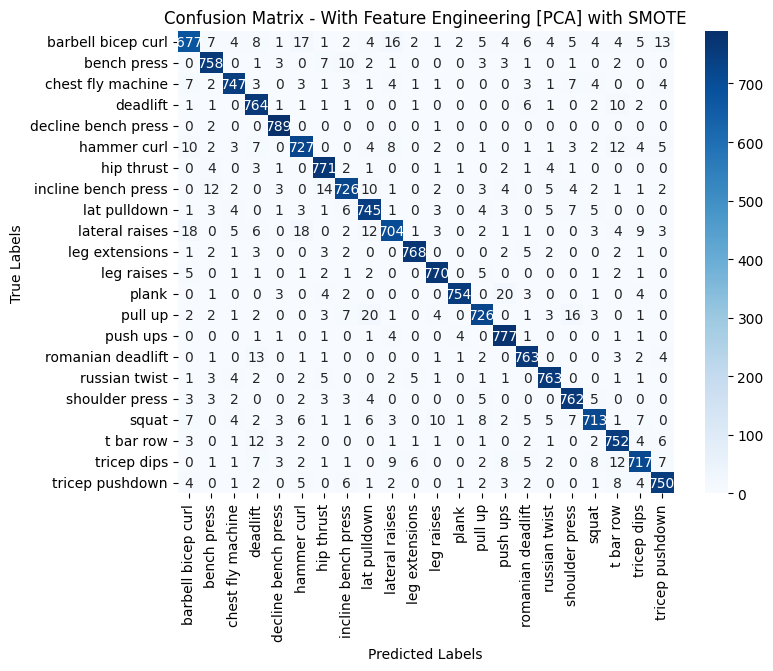


Configuration: With Feature Engineering [PCA] with SMOTE
Best Parameters: {'n_estimators': 200}
Accuracy: 94.2550505050505 %
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       792
           1       0.94      0.96      0.95       792
           2       0.96      0.94      0.95       792
           3       0.91      0.96      0.94       792
           4       0.97      1.00      0.98       792
           5       0.92      0.92      0.92       792
           6       0.94      0.97      0.96       792
           7       0.94      0.92      0.93       792
           8       0.92      0.94      0.93       792
           9       0.93      0.89      0.91       792
          10       0.98      0.97      0.97       792
          11       0.96      0.97      0.97       792
          12       0.99      0.95      0.97       792
          13       0.94      0.92      0.93       792
          14       0.94      0.98      

In [60]:
    
from sklearn.model_selection import cross_val_score, cross_val_predict



def train_model(model, param_grid, X,y,X_val,y_val, apply_smote=False, config_name="Default"):
    
    X_copy = X.copy()
    y_copy = y.copy()

    X_val_copy = X_val.copy()
    y_val_copy = y_val.copy()
    
    if apply_smote:
        smote = SMOTE(random_state=42)
        X_copy, y_copy = smote.fit_resample(X_copy, y_copy)
        config_name += " with SMOTE"
    else:
        config_name += " without SMOTE"

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy'
    )
    grid_search.fit(X_val_copy, y_val_copy)
    best_model = grid_search.estimator.__class__
    best_model = best_model(**grid_search.best_params_)
    best_model.fit(X_copy, y_copy)

    y_predictions = cross_val_predict(best_model, X_copy, y_copy, cv=10)
    list_accuracies = cross_val_score(best_model, X_copy, y_copy, cv=5, scoring='accuracy')

    accuracy = accuracy_score(y_copy, y_predictions)
    report = classification_report(y_copy, y_predictions)
    conf_matrix = confusion_matrix(y_copy, y_predictions)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=Workout_labels,
                yticklabels=Workout_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {config_name}')
    plt.show()
    
    # Print results
    print(f"\nConfiguration: {config_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", (accuracy*100), "%")
    print("Classification Report:\n", report)
    
    # Return results dictionary
    return {
        'name': config_name,
        'list_accuracies': list_accuracies,
        'accuracy': accuracy,
        'best_params': grid_search.best_params_,
        'report': report,
        'confusion_matrix': conf_matrix,
        'predictions': y_predictions,
        'best_estimator': grid_search.best_estimator_,
        'time_taken': grid_search.refit_time_,  # Time taken to fit/train the model
    }

def compare_models(results_list):
    """
    Compare multiple model configurations using hypothesis testing.
    
    Parameters:
    - results_list: List of result dictionaries from train_model function
    """
    from scipy import stats
    
    print("\n" + "="*50)
    print("STATISTICAL HYPOTHESIS TESTING BETWEEN CONFIGURATIONS")
    print("="*50)
    
    # Compare all pairs of configurations
    for i in range(len(results_list)):
        for j in range(i+1, len(results_list)):
            config1 = results_list[i]
            config2 = results_list[j]
            
            # Create arrays of correct/incorrect predictions (1 for correct, 0 for incorrect)
            # predictions1 = config1['predictions']
            # predictions2 = config2['predictions']
            # y_test = config1['y_test'] if 'y_test' in config1 else None
            
            # # Make sure we have the test data
            # if y_test is None:
            #     print(f"Can't compare {config1['name']} vs {config2['name']} without test data.")
            #     continue
                
            # correct1 = (predictions1 == y_test).astype(int)
            # correct2 = (predictions2 == y_test).astype(int)
            
            # Perform paired t-test
            t_stat, p_value = stats.ttest_rel(config1['list_accuracies'], config2['list_accuracies'])
            
            print(f"\nComparing {config1['name']} vs {config2['name']}:")
            print(f"Accuracy {config1['name']}: {config1['accuracy']*100:.2f}%")
            print(f"Accuracy {config2['name']}: {config2['accuracy']*100:.2f}%")
            print(f"Difference: {(config1['accuracy'] - config2['accuracy'])*100:.2f}%")
            print(f"Time taken to train {config1['name']}: {config1['time_taken']:.2f} seconds")
            print(f"Time taken to train {config2['name']}: {config2['time_taken']:.2f} seconds")
            # Null hypothesis: No difference between configurations
            # Alternative hypothesis: There is a significant difference between configurations
            print("\nHypothesis Testing:")
            print("Null Hypothesis (H0): No significant difference in performance between the two configurations")
            print("Alternative Hypothesis (H1): There is a significant difference in performance between the two configurations")
            print(f"T-statistic: {t_stat:.4f}")
            print(f"P-value: {p_value:.4f}")
            
            if p_value < 0.05:
                print("Result: Reject the null hypothesis. There is a statistically significant difference between the configurations.")
                better_config = config1['name'] if config1['accuracy'] > config2['accuracy'] else config2['name']
                print(f"The {better_config} configuration performs significantly better.")
            else:
                print("Result: Fail to reject the null hypothesis. There is no statistically significant difference between the configurations.")
    
    # Find the best configuration
    best_config = max(results_list, key=lambda k: k['accuracy'])
    print("\n" + "="*50)
    print(f"BEST CONFIGURATION: {best_config['name']}")
    print(f"Accuracy: {best_config['accuracy']*100:.2f}%")
    print("="*50)
    
    return best_config['best_estimator']

# Example usage:

# First configuration - No feature engineering, no SMOTE
results1 = train_model(
    model=RandomForestClassifier(random_state=42),
    param_grid={'n_estimators': [100, 200]},
    y=y,
    X=X,    # Original test data without feature engineering
    X_val=X_val,  # Original test data without feature engineering
    y_val=y_val,
    apply_smote=False,
    config_name="No Feature Engineering"
)
results1['y_test'] = y  # Store test data for comparison

# Second configuration - No feature engineering, with SMOTE
results2 = train_model(
    model=RandomForestClassifier(random_state=42),
    param_grid={'n_estimators': [100, 200]},
    X=X,    # Original test data without feature engineering
    y=y,
    X_val=X_val,  # Original test data without feature engineering
    y_val=y_val,
    apply_smote=True,
    config_name="No Feature Engineering"
)
results2['y_test'] = y

# Third configuration - With feature engineering, no SMOTE
results3 = train_model(
    model=RandomForestClassifier(random_state=42),
    param_grid={'n_estimators': [100, 200]},
    X=X_feature_eng,   # Feature engineered training data
    y=y,
    X_val=X_val_feature_eng,  # Feature engineered test data
    y_val=y_val,
    apply_smote=False,
    config_name="With Feature Engineering"
)
results3['y_test'] = y

# Fourth configuration - With feature engineering, with SMOTE
results4 = train_model(
    model=RandomForestClassifier(random_state=42),
    param_grid={'n_estimators': [100, 200]},
    X=X_feature_eng,   # Feature engineered training data
    y=y,   # Feature engineered test data
    X_val=X_val_feature_eng,
    y_val=y_val,
    apply_smote=True,
    config_name="With Feature Engineering"
)
results4['y_test'] = y


results5 = train_model(
    model=RandomForestClassifier(random_state=42),
    param_grid={'n_estimators': [100, 200]},
    X=X_pca,   # Feature engineered training data
    y=y,   # Feature engineered test data
    X_val=X_val_pca_feature_eng,
    y_val=y_val,
    apply_smote=False,
    config_name="With Feature Engineering [PCA]"
)
results5['y_test'] = y


results6 = train_model(
    model=RandomForestClassifier(random_state=42),
    param_grid={'n_estimators': [100, 200]},
    X=X_pca,   # Feature engineered training data
    y=y,   # Feature engineered test data
    X_val=X_val_pca_feature_eng,
    y_val=y_val,
    apply_smote=True,
    config_name="With Feature Engineering [PCA]"

)
results6['y_test'] = y

# X_pca
# Compare all configurations
best_model = compare_models([results1, results2, results3, results4,results5,results6])


**Hierachal classification**